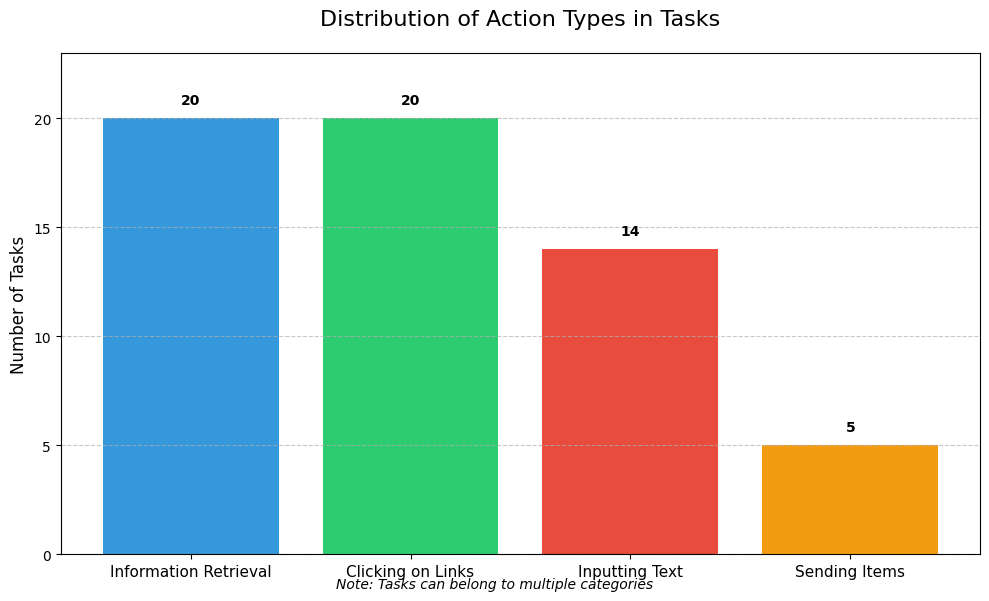

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Data from the analysis
categories = ['Information Retrieval', 'Clicking on Links', 'Inputting Text', 'Sending Items']
counts = [20, 20, 14, 5]

# Create a bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(categories, counts, color=['#3498db', '#2ecc71', '#e74c3c', '#f39c12'])

# Add count labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             f'{int(height)}', ha='center', va='bottom', fontweight='bold')

# Add title and labels
plt.title('Distribution of Action Types in Tasks', fontsize=16, pad=20)
plt.ylabel('Number of Tasks', fontsize=12)
plt.ylim(0, max(counts) + 3)  # Add some space for the labels

# Add grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Customize appearance
plt.xticks(fontsize=11)
plt.yticks(fontsize=10)

# Add a note about tasks potentially belonging to multiple categories
plt.figtext(0.5, 0.01, 'Note: Tasks can belong to multiple categories', 
            ha='center', fontsize=10, style='italic')

plt.tight_layout()
plt.show()

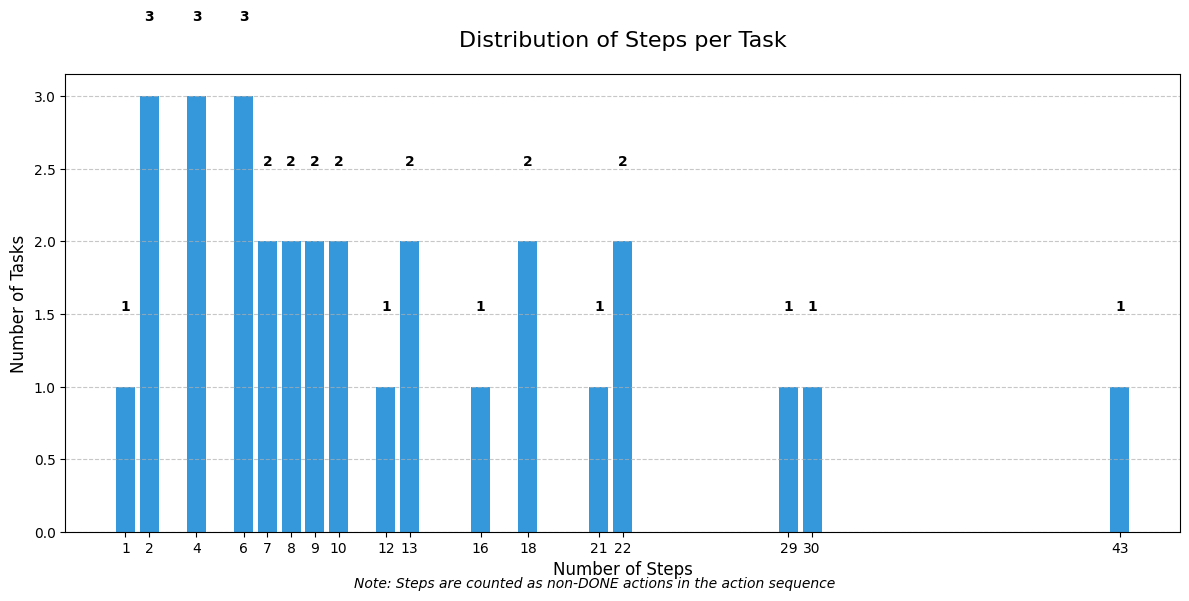

In [3]:
import json
from collections import defaultdict

# Read and process the task sequences
step_counts = defaultdict(int)

with open('summarized_task_sequences.jsonl', 'r') as f:
    lines = f.readlines()
    for line in lines[-30:]:  # Only process last 30 lines
        try:
            data = json.loads(line)
            action_sequence = data.get('action_sequence', [])
            # Count non-DONE actions
            num_steps = len([action for action in action_sequence if action != "DONE"])
            step_counts[num_steps] += 1
        except json.JSONDecodeError:
            continue
# Prepare data for plotting
# step_counts.pop(0)
steps = sorted(step_counts.keys())
counts = [step_counts[step] for step in steps]

# Create the bar chart
plt.figure(figsize=(12, 6))
bars = plt.bar(steps, counts, color='#3498db')

# Add count labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             f'{int(height)}', ha='center', va='bottom', fontweight='bold')

# Customize the plot
plt.title('Distribution of Steps per Task', fontsize=16, pad=20)
plt.xlabel('Number of Steps', fontsize=12)
plt.ylabel('Number of Tasks', fontsize=12)
plt.xticks(steps)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add a note about step counting
plt.figtext(0.5, 0.01, 'Note: Steps are counted as non-DONE actions in the action sequence', 
            ha='center', fontsize=10, style='italic')

plt.tight_layout()
plt.show()


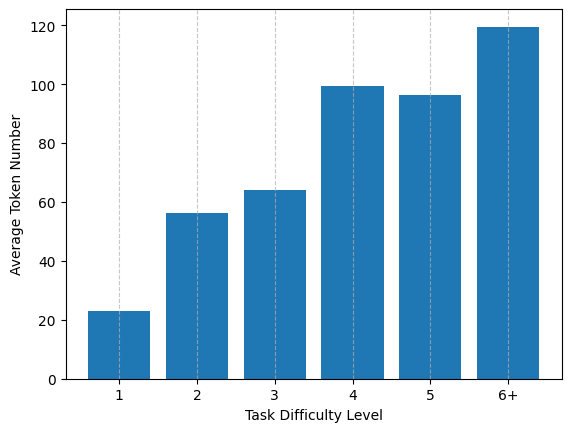

Average subtasks per website: 4.00
Average tokens per summarized task: 78.07
Correlation between subtasks and tokens: 0.51

High token-to-subtask ratio example:
Website: iea-shc.org
Subtasks: 2
Tokens: 86
Ratio: 43.00
Task: On the IEA SHC website, first access the latest news article titled 'Mapping the global thermosiphon...

High token-to-subtask ratio example:
Website: mercadolibre.com.bo
Subtasks: 2
Tokens: 85
Ratio: 42.50
Task: On mercadolibre.com.bo, search for cell phones and filter the search results to show only new Samsun...

High token-to-subtask ratio example:
Website: dmv.vermont.gov
Subtasks: 2
Tokens: 73
Ratio: 36.50
Task: On the Vermont DMV website (dmv.vermont.gov), verify if there are any current outstanding toll fees ...

Low token-to-subtask ratio example:
Website: sciencefun.org
Subtasks: 7
Tokens: 35
Ratio: 5.00
Task: Find detailed information about the 'On Demand' Hands-on Science FUN Field Trip program for Jr Scien...

Low token-to-subtask ratio example:
Website

In [4]:
import json
import matplotlib.pyplot as plt
import tiktoken
import numpy as np
from collections import defaultdict

def count_tokens(text, model="gpt-3.5-turbo"):
    """Count the number of tokens in a text string using tiktoken."""
    encoder = tiktoken.encoding_for_model(model)
    return len(encoder.encode(text))

def analyze_task_counts_and_tokens():
    """
    Count the number of original subtasks per website from task_sequences.jsonl
    and analyze token counts in summarized_task_sequences.jsonl
    """
    # Count original subtasks per website
    website_task_counts = defaultdict(int)
    
    with open("task_sequences.jsonl", 'r') as f:
        for line in f:
            try:
                data = json.loads(line)
                website = data.get('website', '')
                if website:  # Only count if website is not empty
                    website_task_counts[website] += 1
            except json.JSONDecodeError:
                continue
    
    # Get token counts from summarized tasks
    summarized_tasks = {}
    
    with open("summarized_task_sequences.jsonl", 'r') as f:
        lines = f.readlines()
        for line in lines[-29:]:
            try:
                data = json.loads(line)
                website = data.get('website', '')
                task = data.get('task', '')
                if website and task:
                    token_count = count_tokens(task)
                    summarized_tasks[website] = {
                        'task': task,
                        'token_count': token_count
                    }
            except json.JSONDecodeError:
                continue
    
    # Combine the data
    results = []
    for website, count in website_task_counts.items():
        if website in summarized_tasks:
            results.append({
                'website': website,
                'subtask_count': count,
                'token_count': summarized_tasks[website]['token_count'],
                'task': summarized_tasks[website]['task']
            })
    
    return results

# Analyze the data
results = analyze_task_counts_and_tokens()

# Extract data for plotting
subtask_counts = [r['subtask_count'] for r in results]
token_counts = [r['token_count'] for r in results]
websites = [r['website'] for r in results]

# Average by subtask count
average_token_counts = {}
for i, count in enumerate(subtask_counts):
    count = 6 if count > 6 else count
    if count not in average_token_counts:
        average_token_counts[count] = []
    average_token_counts[count].append(token_counts[i])
average_token_counts = {count: sum(tokens) / len(tokens) for count, tokens in average_token_counts.items()}

# Create a scatter plot
plt.figure()
# scatter = plt.scatter(subtask_counts, token_counts, alpha=0.7, s=100, c='blue', edgecolors='navy')
bar = plt.bar(average_token_counts.keys(), average_token_counts.values(), align='center')

# Add a trend line
# z = np.polyfit(subtask_counts, token_counts, 1)
# p = np.poly1d(z)
# plt.plot(subtask_counts, p(subtask_counts), "r--", alpha=0.7, linewidth=2)

x_ticks = list(average_token_counts.keys())
x_tick_labels = [str(x) if x != 6 else "6+" for x in x_ticks]
plt.xticks(x_ticks, x_tick_labels)

# Customize the plot
# plt.title('Number of Subtasks vs Description Token Count')
plt.xlabel('Task Difficulty Level')
plt.ylabel('Average Token Number')
plt.grid(True, linestyle='--', axis='x', alpha=0.7)

# Add correlation coefficient
correlation = np.corrcoef(subtask_counts, token_counts)[0, 1]
# plt.figtext(0.15, 0.85, f'Correlation: {correlation:.2f}', fontsize=12, 
#             bbox=dict(facecolor='white', alpha=0.8, boxstyle='round,pad=0.5'))

# Add annotations for interesting points (high subtask count or token count)
# for i, result in enumerate(results):
#     if result['subtask_count'] > 5 or result['token_count'] > 150:
#         plt.annotate(result['website'], 
#                     (subtask_counts[i], token_counts[i]),
#                     textcoords="offset points", 
#                     xytext=(0,10), 
#                     ha='center',
#                     fontsize=8,
#                     bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))

# plt.tight_layout()
plt.show()

# Print some statistics
print(f"Average subtasks per website: {sum(subtask_counts)/len(subtask_counts):.2f}")
print(f"Average tokens per summarized task: {sum(token_counts)/len(token_counts):.2f}")
print(f"Correlation between subtasks and tokens: {correlation:.2f}")

# Find examples of tasks with high and low token-to-subtask ratios
for result in sorted(results, key=lambda x: x['token_count'] / max(x['subtask_count'], 1), reverse=True)[:3]:
    print(f"\nHigh token-to-subtask ratio example:")
    print(f"Website: {result['website']}")
    print(f"Subtasks: {result['subtask_count']}")
    print(f"Tokens: {result['token_count']}")
    print(f"Ratio: {result['token_count'] / max(result['subtask_count'], 1):.2f}")
    print(f"Task: {result['task'][:100]}...")

for result in sorted(results, key=lambda x: x['token_count'] / max(x['subtask_count'], 1))[:3]:
    print(f"\nLow token-to-subtask ratio example:")
    print(f"Website: {result['website']}")
    print(f"Subtasks: {result['subtask_count']}")
    print(f"Tokens: {result['token_count']}")
    print(f"Ratio: {result['token_count'] / max(result['subtask_count'], 1):.2f}")
    print(f"Task: {result['task'][:100]}...")

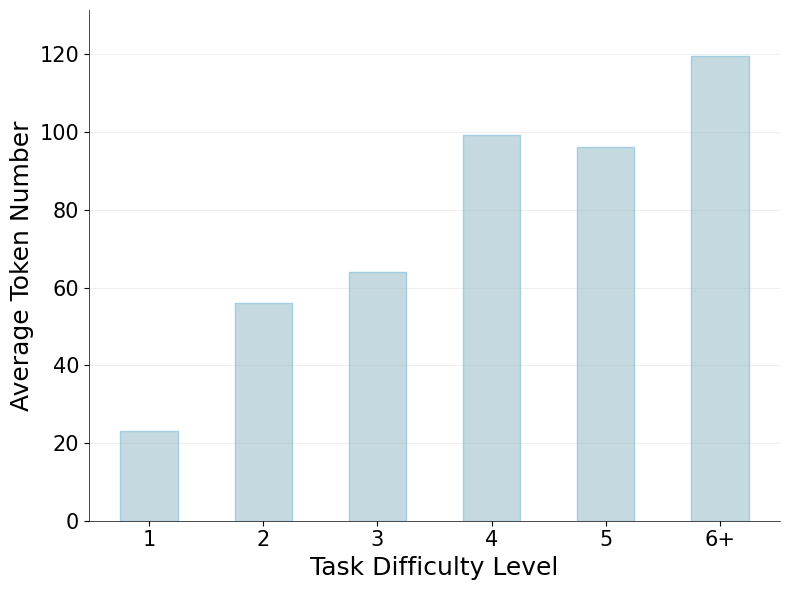

In [5]:
# Extract data for plotting
subtask_counts = [r['subtask_count'] for r in results]
token_counts = [r['token_count'] for r in results]
websites = [r['website'] for r in results]

# Average by subtask count
average_token_counts = {}
for i, count in enumerate(subtask_counts):
    count = 6 if count > 6 else count
    if count not in average_token_counts:
        average_token_counts[count] = []
    average_token_counts[count].append(token_counts[i])
average_token_counts = {count: sum(tokens) / len(tokens) for count, tokens in average_token_counts.items()}

# Create a clean bar chart with light blue bars
plt.figure(figsize=(8, 6))
plt.bar(average_token_counts.keys(), average_token_counts.values(), 
        color='#c4dae0', width=0.5, edgecolor='#A3CDE3')

# Set axis labels
plt.xlabel('Task Difficulty Level', fontsize=18)
plt.ylabel('Average Token Number', fontsize=18)

# Add grid lines for y-axis only
plt.grid(axis='y', linestyle='-', alpha=0.2)

# Set consistent axis limits
plt.ylim(0, max(average_token_counts.values()) * 1.1)

# Clean up x-axis ticks
x_ticks = list(average_token_counts.keys())
x_tick_labels = [str(x) if x != 6 else "6+" for x in x_ticks]
plt.xticks(x_ticks, x_tick_labels, fontsize=15)
plt.yticks(fontsize=15)

# Add thin border around the plot
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_linewidth(0.5)
plt.gca().spines['bottom'].set_linewidth(0.5)

plt.tight_layout()
plt.show()

{'gpt-4.1': [40.0, 12.903225806451612, 46.15384615384615, 23.404255319148938, 14.705882352941178, 9.67741935483871, 0.0, 0.0], 'o4-mini': [12.0, 6.451612903225806, 30.76923076923077, 6.382978723404255, 2.941176470588235, 0.0, 0.0, 0.0]}


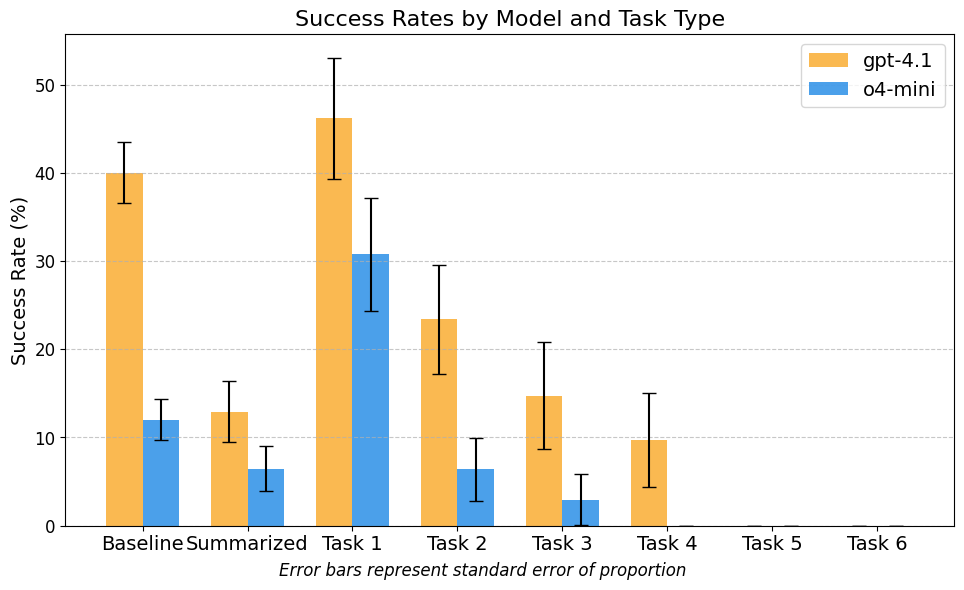

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import json
from math import sqrt

# Load the data from the provided snippets
summarized_results = {}
with open("summarized_results_trajectory.jsonl", "r") as f:
    for line in f:
        data = json.loads(line)
        model = data["model"]
        if model not in summarized_results:
            summarized_results[model] = []
        summarized_results[model].append(data["success"])

with open("sequence_results_trajectory_final.json", "r") as f:
    sequence_results = json.load(f)

with open("baseline_results_trajectory_final.json", "r") as f:
    baseline_results = json.load(f)

# Calculate success rates and standard errors for each category
def calculate_success_rate_and_error(results):
    if not results:
        return 0, 0
    success_rate = sum(1 for r in results if r) / len(results) * 100
    # Standard error of proportion
    p = success_rate / 100  # Convert percentage to proportion
    std_error = sqrt(p * (1-p) / len(results)) * 100  # Convert back to percentage
    return success_rate, std_error

# Models to analyze
models = ["gpt-4.1", "o4-mini"]

categories = ["Baseline", "Summarized"] + [f"Task {i}" for i in range(1, 7)]

# Calculate success rates and errors for each model and category
success_rates = {model: [] for model in models}
error_bars = {model: [] for model in models}

for model in models:
    # Baseline tasks
    rate, error = calculate_success_rate_and_error(baseline_results[model])
    success_rates[model].append(rate)
    error_bars[model].append(error)
    
    # Summarized tasks
    rate, error = calculate_success_rate_and_error(summarized_results[model])
    success_rates[model].append(rate)
    error_bars[model].append(error)
    
    # Sequence tasks 1-6
    for task_idx in range(6):
        # Extract the nth task from each sequence
        nth_task_results = []
        for sequence in sequence_results[model]:
            if len(sequence) > task_idx:
                nth_task_results.append(sequence[task_idx])
        rate, error = calculate_success_rate_and_error(nth_task_results)
        success_rates[model].append(rate)
        error_bars[model].append(error)

# Create the bar chart with larger text and simplified design
x = np.arange(len(categories))
width = 0.35

plt.figure(figsize=(10, 6))
ax = plt.gca()

# Use more distinct colors
rects1 = ax.bar(x - width/2, success_rates["gpt-4.1"], width, label='gpt-4.1', color='#f9a825',
                yerr=error_bars["gpt-4.1"], capsize=5, alpha=0.8, ecolor='black')
rects2 = ax.bar(x + width/2, success_rates["o4-mini"], width, label='o4-mini', color='#1e88e5',
                yerr=error_bars["o4-mini"], capsize=5, alpha=0.8, ecolor='black')
print(success_rates)

# Add labels with larger font sizes
ax.set_ylabel('Success Rate (%)', fontsize=14)
ax.set_title('Success Rates by Model and Task Type', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(categories, fontsize=14)
ax.legend(fontsize=14)

# Add a horizontal grid for better readability
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels on top of each bar with larger font
def add_labels(rects, errors):
    for i, rect in enumerate(rects):
        height = rect.get_height()
        ax.annotate(f'{height:.1f}%',
                    xy=(rect.get_x() + rect.get_width() / 2, height + errors[i] + 1),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=12, fontweight='bold')

# add_labels(rects1, error_bars["gpt-4.1"])
# add_labels(rects2, error_bars["o4-mini"])

# Increase y-axis tick label size
plt.yticks(fontsize=12)

# Add a simple note about error bars
plt.figtext(0.5, 0.01, "Error bars represent standard error of proportion", 
            ha='center', fontsize=12, style='italic')

plt.tight_layout(pad=2.0)
plt.savefig('success_rates_simplified.png', dpi=300, bbox_inches='tight')
plt.show()

# COMMENTED OUT CODE FOR ADDITIONAL DETAILS:
# Full categories list
# categories = ["Baseline", "Summarized", "Sequence Task 1", "Sequence Task 2", 
#               "Sequence Task 3", "Sequence Task 4", "Sequence Task 5", "Sequence Task 6"]

# Add sample sizes for each category
# sample_sizes = []
# # Baseline
# sample_sizes.append(f"n={len(baseline_results['gpt-4.1'])}")
# # Summarized
# sample_sizes.append(f"n={len(summarized_results['gpt-4.1'])}")
# # Sequence tasks 1-2
# for task_idx in range(2):
#     count = sum(1 for seq in sequence_results['gpt-4.1'] if len(seq) > task_idx)
#     sample_sizes.append(f"n={count}")
# 
# for i, size in enumerate(sample_sizes):
#     ax.text(i, -5, size, ha='center', fontsize=10)

# Calculate and display overall success rates
# gpt41_overall, gpt41_error = calculate_success_rate_and_error([item for sublist in baseline_results["gpt-4.1"] for item in ([True] * int(sublist) + [False] * (100 - int(sublist)))])
# o4mini_overall, o4mini_error = calculate_success_rate_and_error([item for sublist in baseline_results["o4-mini"] for item in ([True] * int(sublist) + [False] * (100 - int(sublist)))])
# 
# ax.text(0.01, 0.97, f"Overall GPT-4.1: {gpt41_overall:.1f}% ±{gpt41_error:.1f}%", transform=ax.transAxes, 
#         fontsize=12, fontweight='bold', bbox=dict(facecolor='white', alpha=0.8))
# ax.text(0.01, 0.92, f"Overall O4-mini: {o4mini_overall:.1f}% ±{o4mini_error:.1f}%", transform=ax.transAxes, 
#         fontsize=12, fontweight='bold', bbox=dict(facecolor='white', alpha=0.8))

In [8]:
# Print data from previous graphs
print(average_token_counts)
print("\nSuccess Rates Data:")
print("------------------")
print("GPT-4.1 Success Rates:", success_rates["gpt-4.1"])
print("O4-mini Success Rates:", success_rates["o4-mini"])
print("\nError Bars:")
print("-----------")
print("GPT-4.1 Error Bars:", error_bars["gpt-4.1"])
print("O4-mini Error Bars:", error_bars["o4-mini"])


{6: 119.5, 1: 23.0, 2: 56.125, 5: 96.2, 4: 99.25, 3: 64.0}

Success Rates Data:
------------------
GPT-4.1 Success Rates: [40.0, 12.903225806451612, 46.15384615384615, 23.404255319148938, 14.705882352941178, 9.67741935483871, 0.0, 0.0]
O4-mini Success Rates: [12.0, 6.451612903225806, 30.76923076923077, 6.382978723404255, 2.941176470588235, 0.0, 0.0, 0.0]

Error Bars:
-----------
GPT-4.1 Error Bars: [3.4641016151377544, 3.476231652131127, 6.913207955945516, 6.1759078320880425, 6.0738718621252445, 5.310031559697429, 0.0, 0.0]
O4-mini Error Bars: [2.2978250586152114, 2.547480267357411, 6.400386879521874, 3.56566204934635, 2.8976010768934644, 0.0, 0.0, 0.0]
